In [1]:
import scipy.stats as stats # This is the statistics package
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1234) # set a standard seed so that we can all see the same distributions

# Using SciPy Stats Package for Parametric Probability Distributions

The SciPy Stats package allows us to work with a large number of Parametric Probability Distributions.  We can do a lot with these.  We can run trials with them (get a collection of random variables from them), find the probability distribution function (PDF), the cumulative distribution function (CDF), and even fit observations to them.

To get random variables, we often use the `stats.DISTRIBUTION.rvs` command, where `DISTRIBUTION` is the name of the statistical distribution.

This notebook will cover four discrete probability distributions that are described in the Wilks' Statistics Book for this course.

<span style='color:red'>Warning: This Notebook is Not Finished!</span>

# Discrete Disributions:
---
## 1. Binomial Distribution

This is one of the simplest parametric distributions, and is often used in textbooks to illustrate the use and properties of parametric distributions.

This distribution pertains to the outcomes of situations where over some number of trials, one or the other of two **mutually exclusive collectively exhaustive** (MECE) events will occur.

These two events could be "success"/"failure", but we can use other binary categories, like "tornado"/"no tornado" or "rain"/"no rain" or "truth"/"lie".

#### How it works:
- One of the events, is assigned the number 1, and the other is assigned the number 0.
- A random variable $X$ is the number of event occurances (sum of 1s and 0s) in some number of trials $N$.
- the probabilty of the event is given by $p$
- $N$ can be any positive integer.
- $X$ can take on any non-negative integer value from 0 to $N$.

This distribution can calculate probabilities for each of the $N$ + 1 possible values of $X$ given two conditions:

1. The probability of the event occurring does not change from trial to trial (occurance probability is stationary).  This might be an issue with cyclic events.
2. The outcomes on each of the $N$ trails are mutually independent.  Some weather events are correlated in time, so be careful!

In [27]:
N = 100
p = 0.6

df = stats.binom.rvs(n=N, p=p, size=100)
binomial_dist = pd.DataFrame(df)
binomial_dist

,0
0,57
1,64
2,66
3,68
4,61
...,...
95,59
96,61
97,60
98,61


With the data in a DataFrame, we can apply EDA-type functions like describe() to understand more about the data.

In [28]:
binomial_dist.describe()

,0
count,100.000000
mean,60.510000
std,3.841546
min,52.000000
25%,58.000000
50%,60.500000
75%,63.000000
max,72.000000


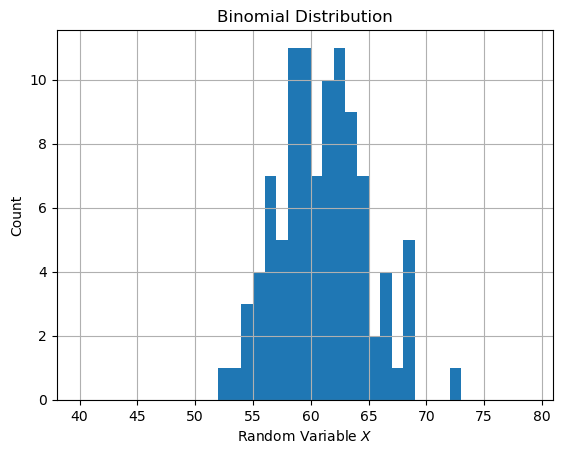

In [29]:
plt.title("Binomial Distribution")
plt.hist(binomial_dist, bins=np.arange(40,80))
plt.grid()
plt.ylabel("Count")
plt.xlabel("Random Variable $X$")
plt.show()

Python also allows us to calculate the Probability Distribution Function (PDF), or in the case of a discrete probability distribution like the Binomial Distribution, a Probability Mass Function (PMF):

$P(X=x) = {n\choose k} p^k (1-p)^{n-k}, x=0,1,...,N$

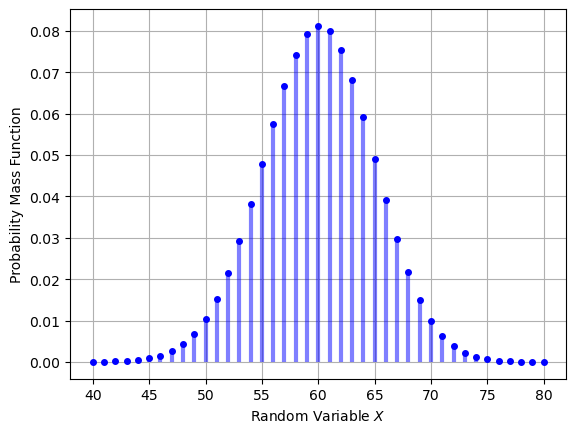

In [39]:
x = np.arange(40,81,1)
pmf = stats.binom.pmf(x, n=N, p=p)

plt.plot(x, pmf, 'bo', ms=4)
plt.vlines(x, 0, pmf, colors='b', lw=3, alpha=0.5)
plt.ylabel("Probability Mass Function")
plt.xlabel("Random Variable $X$")
plt.grid()
plt.show()

## 2. Geometric Distribution

This distribution is somewhat related to the binomial distribution, but it describes a different aspect of the data-generating situation.  This distribution instead addresses how many trials are required to get a "success" after having a successive number of "failures" (same cavieats apply for the labels).  For the weather, we can think of this as a way to describe lengths of weather regimes or "spells".  For example, how many dry time periods occur before a wet event?  Another way of understanding this type of distribution is that it's a "waiting distribution".

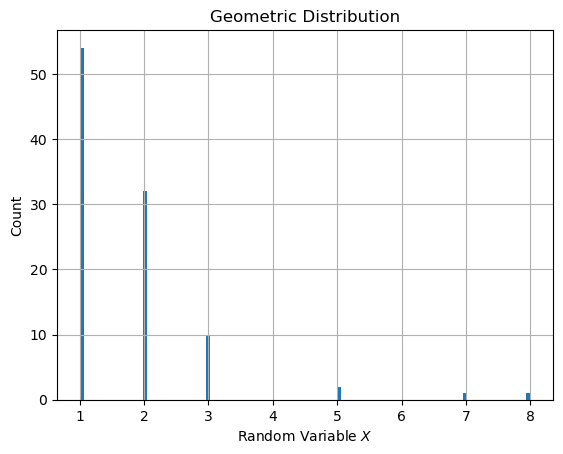

In [42]:
df = stats.geom.rvs(p=0.6, size=100)
binomial_dist = pd.DataFrame(df)

plt.title("Geometric Distribution")
plt.hist(binomial_dist, 100)
plt.grid()
plt.ylabel("Count")
plt.xlabel("Random Variable $X$")
plt.show()

Here is the probability mass function for the geometric distribution:

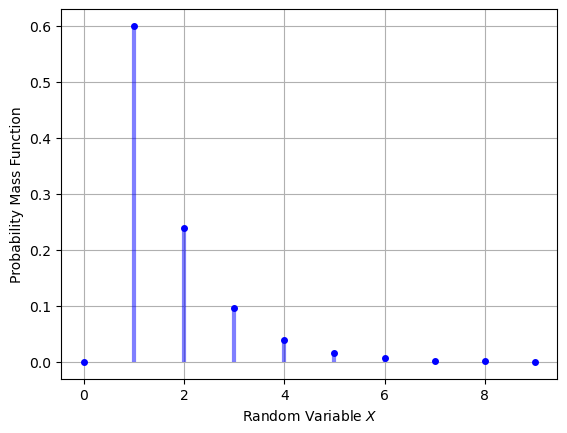

In [45]:
x = np.arange(0,10,1)
pmf = stats.geom.pmf(x, p=0.6)

plt.plot(x, pmf, 'bo', ms=4)
plt.vlines(x, 0, pmf, colors='b', lw=3, alpha=0.5)
plt.ylabel("Probability Mass Function")
plt.xlabel("Random Variable $X$")
plt.grid()
plt.show()

## 3. Negative Binomial

The negative binomial distribution is somewhat more complex, but asks a similar, but different question than the geometric distribution.  Whereas the geometric distribution wants to know how long one has to wait to get the *first* success in a sequence of independent Bernoulli trials ($N$=1), the Negative Binomial distribution seeks to know how long one has to wait for $k$ successes.

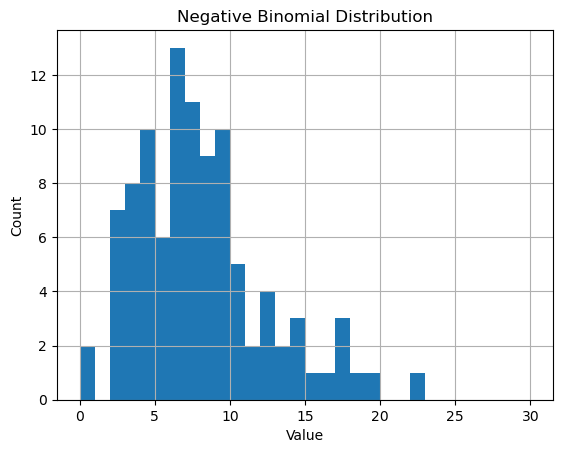

In [67]:
N = 5 # number of successes needed
p = 0.4 # probability of a single success

df = stats.nbinom.rvs(n=N, p=p, size=100)
binomial_dist = pd.DataFrame(df)

plt.title("Negative Binomial Distribution")
plt.hist(binomial_dist, np.arange(0,31,1))
plt.grid()
plt.ylabel("Count")
plt.xlabel("Value")
plt.show()

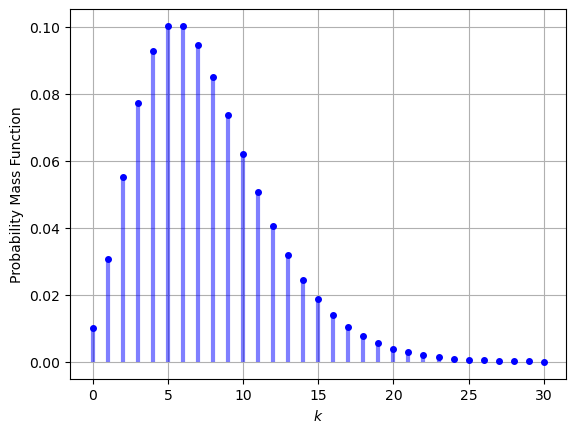

In [68]:
k = np.arange(0,31,1) # number of failures before N successes.
pmf = stats.nbinom.pmf(k=k, n=N, p=p)

plt.plot(x, pmf, 'bo', ms=4)
plt.vlines(x, 0, pmf, colors='b', lw=3, alpha=0.5)
plt.ylabel("Probability Mass Function")
plt.xlabel("$k$")
plt.grid()
plt.show()

## 4. Poisson Distribution

This distribution describes the number of discrete events occurring in a series (or a sequence).  It works only on data where the counts are a non-negative integer values.  Usually this sequence is in time, but it can also be in space.

Poisson events do occur randomly and are described by a single parameter called the constant average occurance rate $\mu$.  It's also sometimes called the *intensity* and has physical dimensions of occurances per unit time.

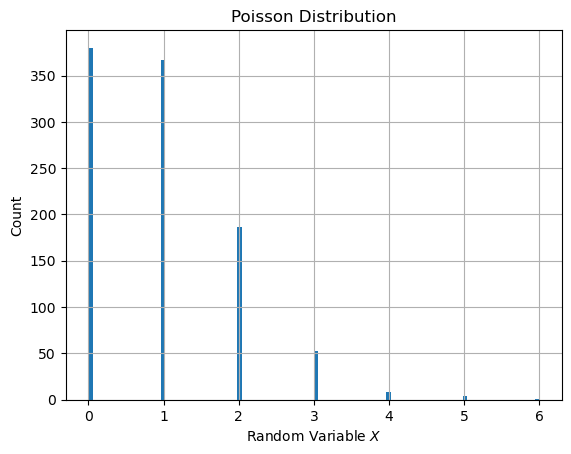

In [73]:
mu = 1
df = stats.poisson.rvs(mu, size=1000)
poisson_dist = pd.DataFrame(df)

plt.title("Poisson Distribution")
plt.hist(poisson_dist, 100)
plt.grid()
plt.ylabel("Count")
plt.xlabel("Random Variable $X$")
plt.show()

$P(X=x) = \frac{\mu^x e^{-\mu}}{x!}$

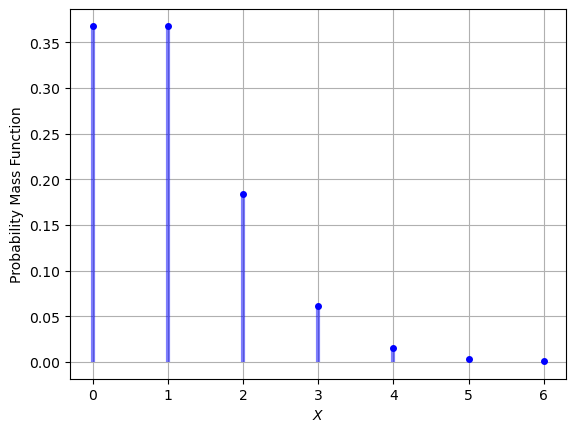

In [79]:
x = np.arange(0,7,1) # number of failures before N successes.
pmf = stats.poisson.pmf(x, mu=mu)

plt.plot(x, pmf, 'bo', ms=4)
plt.vlines(x, 0, pmf, colors='b', lw=3, alpha=0.5)
plt.ylabel("Probability Mass Function")
plt.xlabel("$X$")
plt.grid()
plt.show()